In [14]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
file_path = r'C:\Users\tiara.santoso\Downloads\clustered_results_20240215.xlsx'


In [15]:
df = pd.read_excel(file_path, sheet_name = 'Data')
df.head()

store_name  minicluster_1  minicluster_2  \
0            Sociolla Lippo Mall Puri              0              2   
1               Sociolla Pakuwon Mall              0              1   
2         Sociolla Summarecon Serpong              0              1   
3  Sociolla Lippo Mall Kemang Village              2              2   
4             Sociolla Sunplaza Medan              0              1   

   minicluster_3  minicluster_4  minicluster_5  
0              2              1              1  
1              2              1              3  
2              2              1              1  
3              2              1              1  
4              2              1              3

## Non-weighted Re-calibrated Hierarchical Cluster using method: 'average'

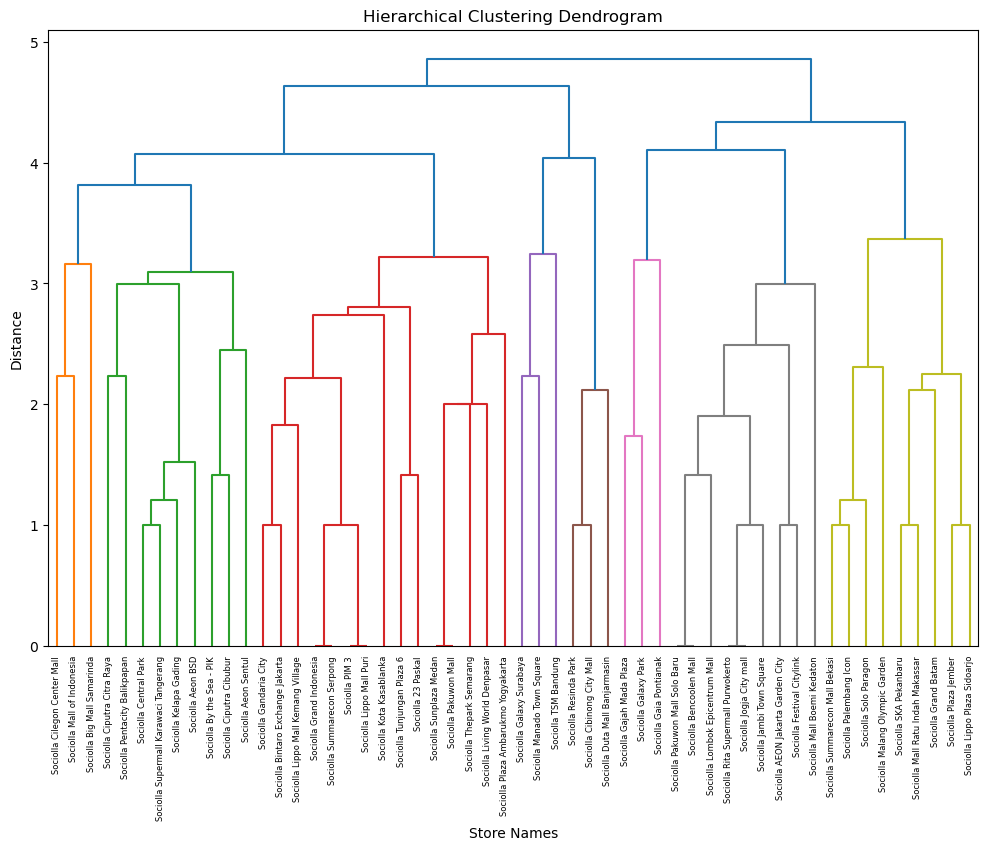

In [11]:

from scipy.cluster.hierarchy import linkage, dendrogram

final_clustering_results = pd.read_excel(file_path, sheet_name = 'Data')


store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]


linkage_matrix = linkage(membership_values, method='average')  # different linkage methods (ward, complete, average)


plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()


In [18]:
#visualize with scatterplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(membership_values)

# Plot the reduced data points in a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.5)  # Adjust color and transparency as needed
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [27]:
from scipy.cluster.hierarchy import fcluster

# Extract cluster labels
cutoff_height_1 = 4  # Adjust this cutoff height based on your dendrogram
clusters_1 = fcluster(linkage_matrix, t=cutoff_height_1, criterion='distance')
cutoff_height_2 = 3.5  # Adjust this cutoff height based on your dendrogram
clusters_2 = fcluster(linkage_matrix, t=cutoff_height_2, criterion='distance')
cutoff_height_3 = 3  # Adjust this cutoff height based on your dendrogram
clusters_3 = fcluster(linkage_matrix, t=cutoff_height_3, criterion='distance')

# Add the cluster labels to the original DataFrame
final_clustering_results['Cluster_1'] = clusters_1
final_clustering_results['Cluster_2'] = clusters_2
final_clustering_results['Cluster_3'] = clusters_3

# Display basic statistics for each cluster
cluster_stats = final_clustering_results.groupby('Cluster_2').describe()

# Save the hierarchical clustering results with statistics to a CSV file
output_file = '20240219 - hierarchical_clustering_results_nonweight.csv'
final_clustering_results.to_csv(output_file, index=False)

# Save the statistics to a separate CSV file
output_stats_file = '20240219 - cluster_statistics_nonweight.csv'
cluster_stats.to_csv(output_stats_file)

print("Results saved to:", output_file, "and", output_stats_file)

Results saved to: 20240219 - hierarchical_clustering_results_nonweight.csv and 20240219 - cluster_statistics_nonweight.csv


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Perform hierarchical clustering
# linkage_matrix = linkage(df, method='average')  # Assuming this is already computed

# Reorder rows and columns based on hierarchical clustering
row_order = dendrogram(linkage_matrix, no_plot=True)['leaves']
col_order = dendrogram(linkage_matrix, no_plot=True, orientation='right')['leaves']
clustered_df = df.iloc[row_order, col_order]

# Clustered Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(clustered_df, cmap='viridis', linewidths=0.5, linecolor='lightgray')
plt.title('Clustered Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Clustered Matrix
plt.figure(figsize=(8, 6))
plt.imshow(clustered_df, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Clustered Matrix')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

IndexError: positional indexers are out-of-bounds

## Non-weighted Re-calibrated Hierarchical Cluster using method: 'complete'

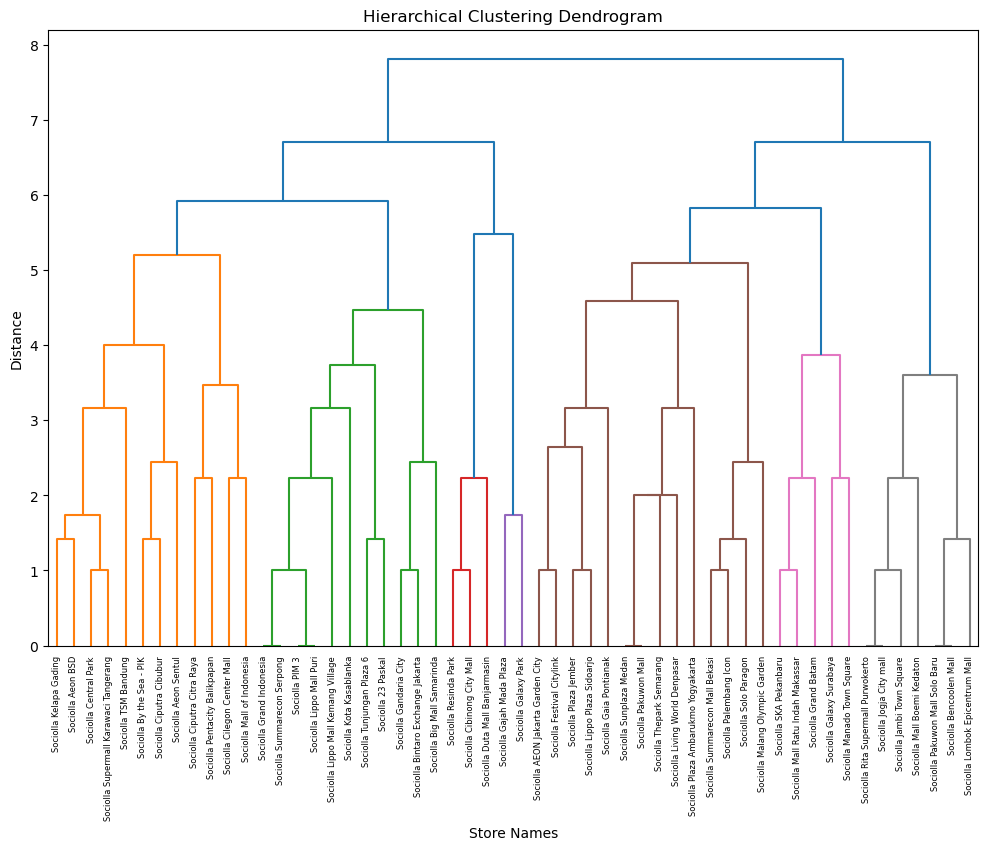

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

final_clustering_results = pd.read_excel(file_path, sheet_name = 'Data')


store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]


linkage_matrix = linkage(membership_values, method='complete')  # different linkage methods (ward, complete, average)


plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

## Non-weighted Re-calibrated Hierarchical Cluster using method: 'ward'

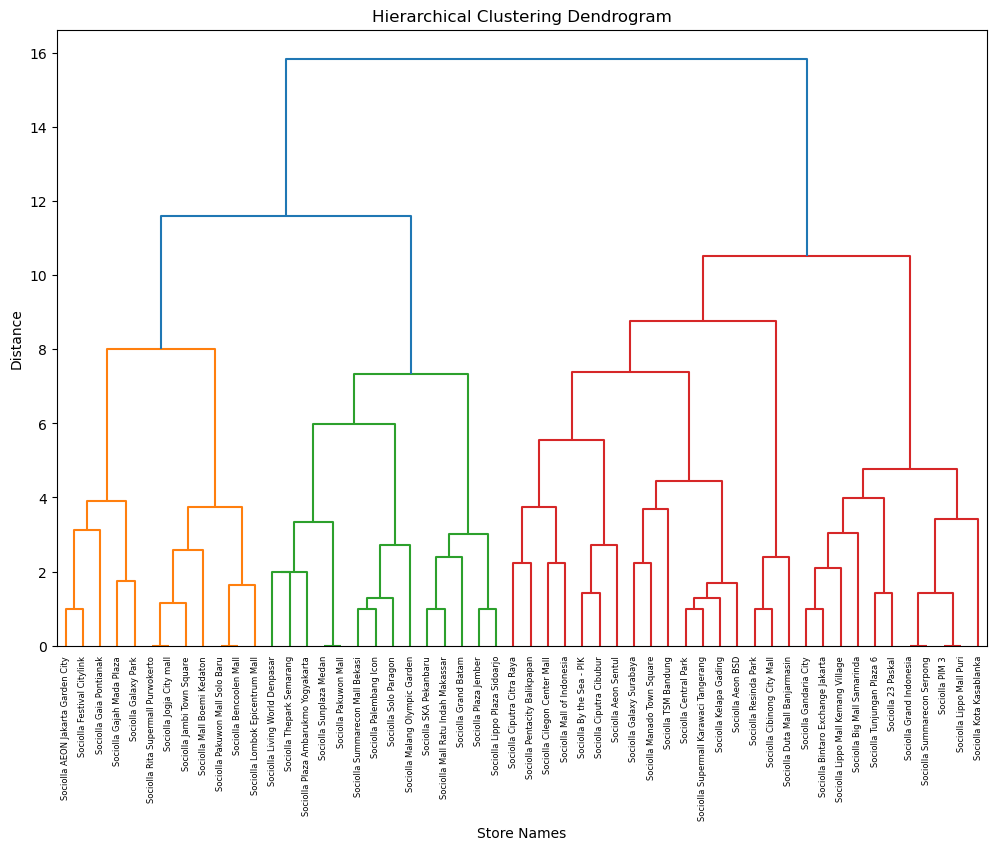

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

final_clustering_results = pd.read_excel(file_path, sheet_name = 'Data')


store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]


linkage_matrix = linkage(membership_values, method='ward')  # different linkage methods (ward, complete, average)


plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Read the data
final_clustering_results = pd.read_excel(file_path, sheet_name='Data')

# Extract store names and clustering membership values
store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]  # Assuming clustering membership values start from the second column

# Define weights for each variable (minicluster)
weights = [0.25, 0.25, 0.25, 0.15, 0.10]

# Apply weights to membership values
weighted_membership_values = membership_values.mul(weights)

# Perform hierarchical clustering
linkage_matrix = linkage(weighted_membership_values, method='ward')  # You can experiment with different linkage methods (ward, complete, average)

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Read the data
final_clustering_results = pd.read_excel(file_path, sheet_name='Data')

# Extract store names and clustering membership values
store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]  # Assuming clustering membership values start from the second column

# Define weights for each variable (minicluster)
weights = [0.25, 0.25, 0.25, 0.15, 0.10]

# Apply weights to membership values
weighted_membership_values = membership_values.mul(weights)

# Perform hierarchical clustering
linkage_matrix = linkage(weighted_membership_values, method='complete')  # You can experiment with different linkage methods (ward, complete, average)

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Read the data
final_clustering_results = pd.read_excel(file_path, sheet_name='Data')

# Extract store names and clustering membership values
store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]  # Assuming clustering membership values start from the second column

# Define weights for each variable (minicluster)
weights = [0.25, 0.25, 0.25, 0.15, 0.10]

# Apply weights to membership values
weighted_membership_values = membership_values.mul(weights)

# Perform hierarchical clustering
linkage_matrix = linkage(weighted_membership_values, method='average')  # You can experiment with different linkage methods (ward, complete, average)

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

In [3]:
# trying the unweighted version


import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Read the data
final_clustering_results = pd.read_excel(file_path, sheet_name='Data')

# Extract store names and clustering membership values
store_names = final_clustering_results['store_name']
membership_values = final_clustering_results.iloc[:, 1:]  # Assuming clustering membership values start from the second column

# Apply weights to membership values
weighted_membership_values = membership_values.mul(weights)

# Perform hierarchical clustering
linkage_matrix = linkage(weighted_membership_values, method='average')  # You can experiment with different linkage methods (ward, complete, average)

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

# Extract cluster labels
cutoff_height_1 = 1  # Adjust this cutoff height based on your dendrogram
clusters_1 = fcluster(linkage_matrix, t=cutoff_height_1, criterion='distance')
cutoff_height_2 = 0.9  # Adjust this cutoff height based on your dendrogram
clusters_2 = fcluster(linkage_matrix, t=cutoff_height_2, criterion='distance')
cutoff_height_3 = 0.8  # Adjust this cutoff height based on your dendrogram
clusters_3 = fcluster(linkage_matrix, t=cutoff_height_3, criterion='distance')

# Add the cluster labels to the original DataFrame
final_clustering_results['Cluster_1'] = clusters_1
final_clustering_results['Cluster_2'] = clusters_2
final_clustering_results['Cluster_3'] = clusters_3

# Display basic statistics for each cluster
cluster_stats = final_clustering_results.groupby('Cluster_2').describe()

# Save the hierarchical clustering results with statistics to a CSV file
output_file = '20240213 - hierarchical_clustering_results2.csv'
final_clustering_results.to_csv(output_file, index=False)

# Save the statistics to a separate CSV file
output_stats_file = '20240215 - cluster_statistics2.csv'
cluster_stats.to_csv(output_stats_file)

print("Results saved to:", output_file, "and", output_stats_file)


Results saved to: 20240213 - hierarchical_clustering_results2.csv and 20240215 - cluster_statistics2.csv


In [52]:
import plotly.graph_objects as go
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(membership_values, method='ward')

# Set up the hierarchical clustering
dendrogram_trace = go.Figure(data=[go.Scatter(x=[], y=[])],
                             layout=go.Layout(xaxis=dict(title='Store Names'),
                                              yaxis=dict(title='Distance'),
                                              showlegend=False))

# Create a dendrogram trace
for i in range(len(linkage_matrix)):
    dendrogram_trace.add_trace(
        go.Scatter(x=[linkage_matrix[i, 0], linkage_matrix[i, 0], linkage_matrix[i, 2], linkage_matrix[i, 2]],
                   y=[0, linkage_matrix[i, 1], linkage_matrix[i, 1], 0],
                   line=dict(color='black'),
                   hoverinfo='skip',  # Skip hoverinfo for the dendrogram lines
                   showlegend=False)
    )

# Extract cluster labels
cutoff_height = 40  # Adjust this cutoff height based on your dendrogram
clusters = fcluster(linkage_matrix, t=cutoff_height, criterion='distance')

# Annotate the dendrogram with cluster labels
for cluster, height in zip(clusters, linkage_matrix[:, 2]):
    label = f'Cluster {cluster}'
    dendrogram_trace.add_trace(
        go.Scatter(x=[height], y=[0], mode='text', text=label, showlegend=False, hoverinfo='text')
    )

# Update layout
dendrogram_trace.update_layout(title='Hierarchical Clustering Dendrogram with Cluster Annotations',
                               hovermode='closest')

# Show the interactive plot
dendrogram_trace.show()


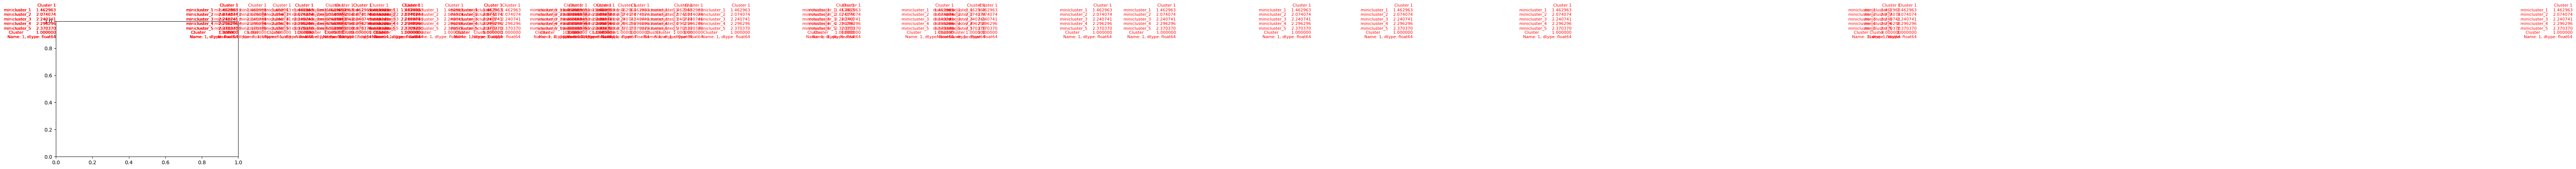

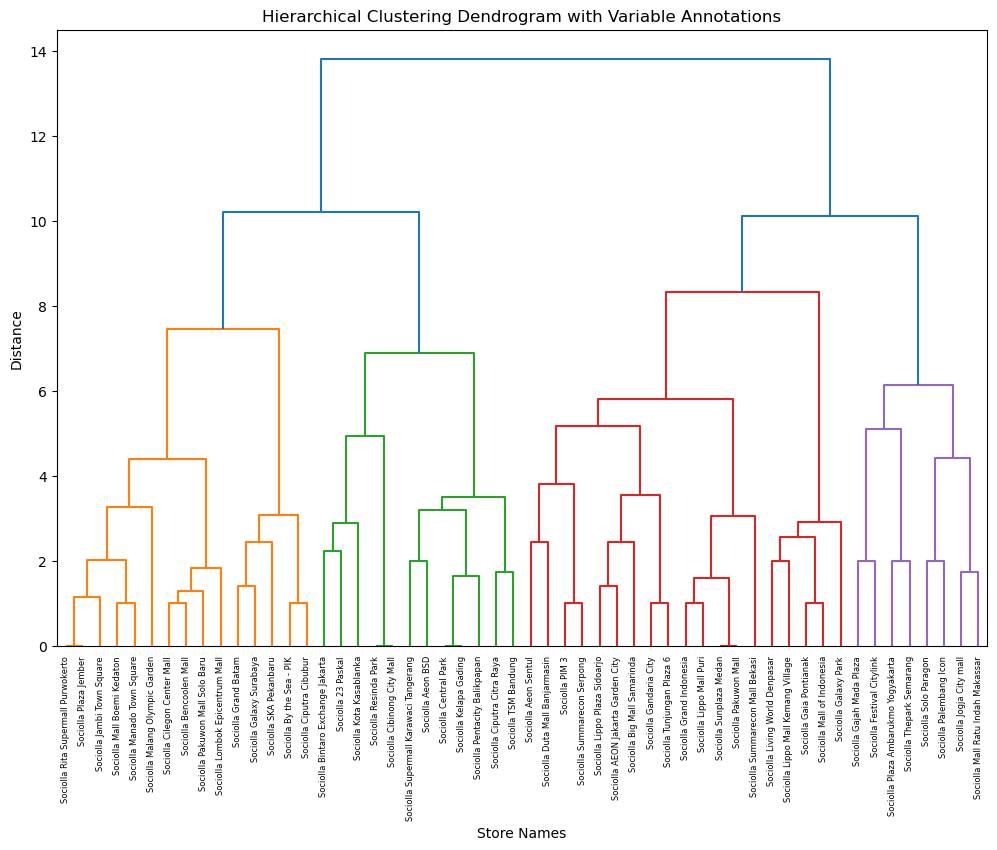

In [50]:
from scipy.cluster.hierarchy import fcluster

# Determine cutoff height (you may adjust this value)
cutoff_height = 100

# Cut the dendrogram to form clusters
clusters = fcluster(linkage_matrix, t=cutoff_height, criterion='distance')

# Assign cluster labels to each store name
final_clustering_results['Cluster'] = clusters

# Identify numeric columns for mean calculation
numeric_columns = final_clustering_results.columns[1:]  # Exclude the first column (store_name)

# Convert selected columns to numeric (excluding 'store_name' column)
final_clustering_results[numeric_columns] = final_clustering_results[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate mean values of variables for each cluster
cluster_means = final_clustering_results.groupby('Cluster')[numeric_columns].mean()

# Annotate the dendrogram with variable labels
for cluster, height in zip(clusters, linkage_matrix[:, 2]):
    # Get the mean values for the cluster
    cluster_mean_values = cluster_means.loc[cluster]
    
    # Annotate the dendrogram with variable labels
    plt.text(height, cluster, f'Cluster {cluster}\n{cluster_mean_values}', color='red', fontsize=8, ha='right', va='center')

# Plot the dendrogram with annotations
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=store_names.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram with Variable Annotations')
plt.xlabel('Store Names')
plt.ylabel('Distance')
plt.show()


In [1]:
import pandas as pd

# Assuming you have already performed hierarchical clustering and have clusters stored in 'clusters' variable

# Calculate statistics for each cluster
cluster_statistics = final_clustering_results.groupby('Cluster')[numeric_columns].describe()

# Save the statistics to an Excel file
cluster_statistics.to_excel('cluster_statistics.xlsx')


NameError: name 'final_clustering_results' is not defined

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\tiara.santoso\Downloads\clustered_results_20240129.xlsx'
sheet_name_group1 = 'Data'

clustered_data = pd.read_excel(file_path, sheet_name=sheet_name_group1, index_col='store_name')


# Create a heatmap of original variables ordered based on the dendrogram
plt.figure(figsize=(12, 8))
sns.heatmap(clustered_data, cmap='viridis', annot=False)
plt.title('Original Variables Heatmap')
plt.xlabel('Original Variables')
plt.ylabel('Store Names')
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

We need to change the categorical data into a numerical format by one-hot encoding, and scale the numerical data.

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



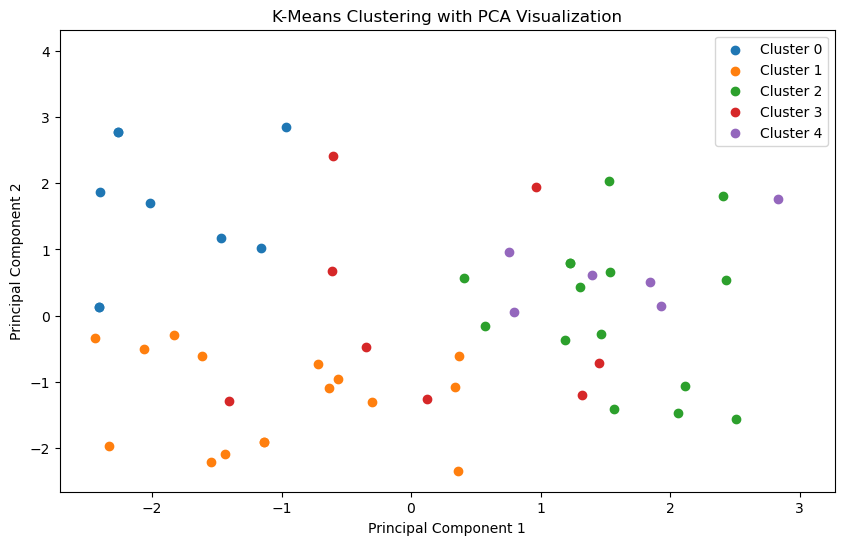

PCA Loadings Analysis:
               PC1 Loadings  PC2 Loadings
minicluster_1      0.114975      0.108370
minicluster_2     -0.898917      0.123646
minicluster_3     -0.003432     -0.867761
minicluster_4     -0.415026     -0.300417
minicluster_5      0.080441     -0.360150


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you've already read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Data')

# Extract the relevant features for clustering (adjust columns as needed)
# For example, if you want to use columns 'feature1' and 'feature2' for clustering:
# features = df[['feature1', 'feature2']]
# Adjust the columns based on your actual dataset.

# Assuming you have features in all columns except the first one (considering the first column as an index)
features = df.iloc[:, 1:]

# Choose the number of clusters (5 or 6 in your case)
num_clusters = 5  # or 6

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(features)

# Add a new column to your DataFrame indicating the cluster assignment for each row
df['Cluster'] = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Add PCA components to the DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Plot the PCA visualization with point centroid connections
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

# Plot centroids with connections
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='', s=200, c='red')
    plt.plot([centroid[0], centroids[i][0]], [centroid[1], centroids[i][1]], c='red', linestyle='--')

plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# PCA Loadings Analysis
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1 Loadings', 'PC2 Loadings'], index=features.columns)

print("PCA Loadings Analysis:")
print(loadings_df)


In [24]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you've already read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Data')

# Extract the relevant features for clustering (adjust columns as needed)
# For example, if you want to use columns 'feature1' and 'feature2' for clustering:
# features = df[['feature1', 'feature2']]
# Adjust the columns based on your actual dataset.

# Assuming you have features in all columns except the first one (considering the first column as an index)
features = df.iloc[:, 1:]

# Choose the number of clusters (5 or 6 in your case)
num_clusters = 5  # or 6

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(features)

# Add a new column to your DataFrame indicating the cluster assignment for each row
df['Cluster'] = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Add PCA components to the DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Create an interactive scatter plot using Plotly Express
fig = go.Figure()

# Scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_points = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scattergl(x=cluster_points['PCA1'], y=cluster_points['PCA2'], mode='markers',
                               name=f'Cluster {cluster}', text=cluster_points.index,
                               marker=dict(size=8)))

    # Plot centroids with connections
    centroid = kmeans.cluster_centers_[cluster]
    fig.add_trace(go.Scattergl(x=[centroid[0]], y=[centroid[1]], mode='markers',
                               name=f'Centroid {cluster}', text=f'Centroid {cluster}',
                               marker=dict(symbol='x', size=12, color='red')))

    # Add a trace for the line connecting each data point to its centroid
    for index, point in cluster_points.iterrows():
        fig.add_trace(go.Scattergl(x=[point['PCA1'], centroid[0]], y=[point['PCA2'], centroid[1]],
                                   mode='lines', line=dict(color='red', width=1),
                                   hoverinfo='skip'))

# Customize the layout
fig.update_layout(title='K-Means Clustering with PCA Visualization',
                  xaxis_title='Principal Component 1',
                  yaxis_title='Principal Component 2')

# Show the plot
fig.show()

# PCA Loadings Analysis
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1 Loadings', 'PC2 Loadings'], index=features.columns)

print("PCA Loadings Analysis:")
print(loadings_df)


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



PCA Loadings Analysis:
               PC1 Loadings  PC2 Loadings
minicluster_1      0.114975      0.108370
minicluster_2     -0.898917      0.123646
minicluster_3     -0.003432     -0.867761
minicluster_4     -0.415026     -0.300417
minicluster_5      0.080441     -0.360150


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



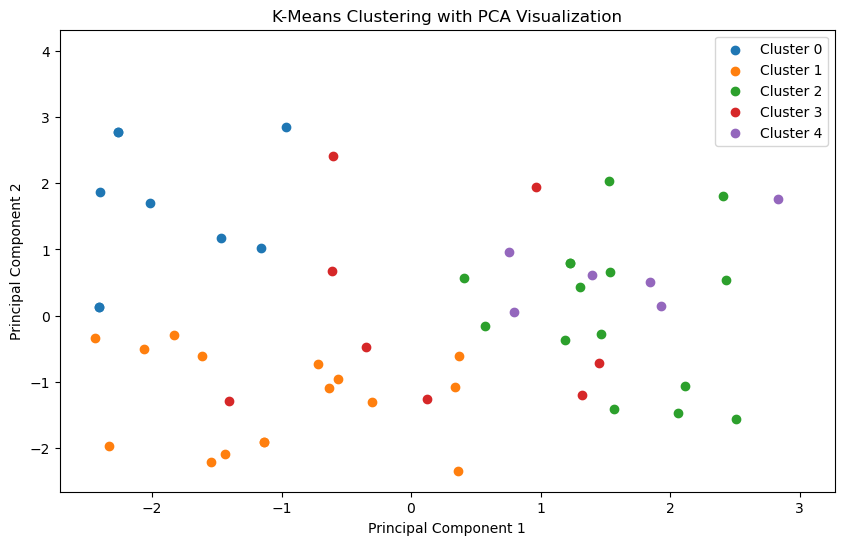

PCA Loadings Analysis:
               PC1 Loadings  PC2 Loadings
minicluster_1      0.114975      0.108370
minicluster_2     -0.898917      0.123646
minicluster_3     -0.003432     -0.867761
minicluster_4     -0.415026     -0.300417
minicluster_5      0.080441     -0.360150


In [32]:
df = pd.read_excel(file_path, sheet_name='Data')

# Extract the relevant features for clustering (adjust columns as needed)
# For example, if you want to use columns 'feature1' and 'feature2' for clustering:
# features = df[['feature1', 'feature2']]
# Adjust the columns based on your actual dataset.

# Assuming you have features in all columns except the first one (considering the first column as an index)
features = df.iloc[:, 1:]

# Choose the number of clusters (5 or 6 in your case)
num_clusters = 5  # or 6

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(features)

# Add a new column to your DataFrame indicating the cluster assignment for each row
df['Cluster'] = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Add PCA components to the DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Save the DataFrame with cluster assignments to a CSV file
df.to_csv('clustering_results.csv', index=False)

# Plot the PCA visualization with point centroid connections
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

# Plot centroids with connections
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='', s=200, c='red')
    plt.plot([centroid[0], centroids[i][0]], [centroid[1], centroids[i][1]], c='red', linestyle='--')

plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# PCA Loadings Analysis
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1 Loadings', 'PC2 Loadings'], index=features.columns)

print("PCA Loadings Analysis:")
print(loadings_df)

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



ValueError: Shape of passed values is (5, 5), indices imply (5, 2)

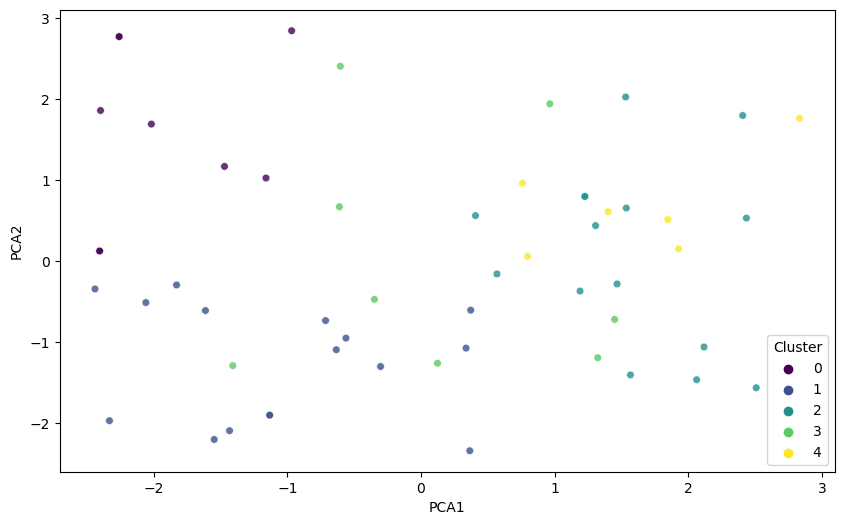

In [27]:
from sklearn.decomposition import PCA

# Assuming you've already read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Data')

# Extract the relevant features for clustering (adjust columns as needed)
# For example, if you want to use columns 'feature1' and 'feature2' for clustering:
# features = df[['feature1', 'feature2']]
# Adjust the columns based on your actual dataset.

# Assuming you have features in all columns except the first one (considering the first column as an index)
features = df.iloc[:, 1:]

# Choose the number of clusters (5 or 6 in your case)
num_clusters = 5  # or 6

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(features)

# Add a new column to your DataFrame indicating the cluster assignment for each row
df['Cluster'] = kmeans.labels_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Add PCA components to the DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Plot the PCA visualization with point centroid connections using Seaborn
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=30, alpha=0.8)

# Draw lines from each point to its cluster centroid
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PCA1', 'PCA2'])
for cluster, centroid in centroids.iterrows():
    points_in_cluster = df[df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    for point in points_in_cluster:
        plt.plot([point[0], centroid['PCA1']], [point[1], centroid['PCA2']], 'k-', alpha=0.3)  # Lines from points to centroid
    plt.plot(centroid['PCA1'], centroid['PCA2'], 'o', color='red', markersize=10, markeredgecolor='black')  # Centroid marker

plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# PCA Loadings Analysis
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1 Loadings', 'PC2 Loadings'], index=features.columns)

print("PCA Loadings Analysis:")
print(loadings_df)


In [ ]:
df_features.head()

So, according to the elbow method, the ideal number of clusters should be around 5-10 --> the range when the inertia starts to stagnate.

Let's compare with silhouette score.

In [6]:
transformed_features = kmeans_pipeline.named_steps['preprocessor'].transform(df_features)
                                                                             

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436

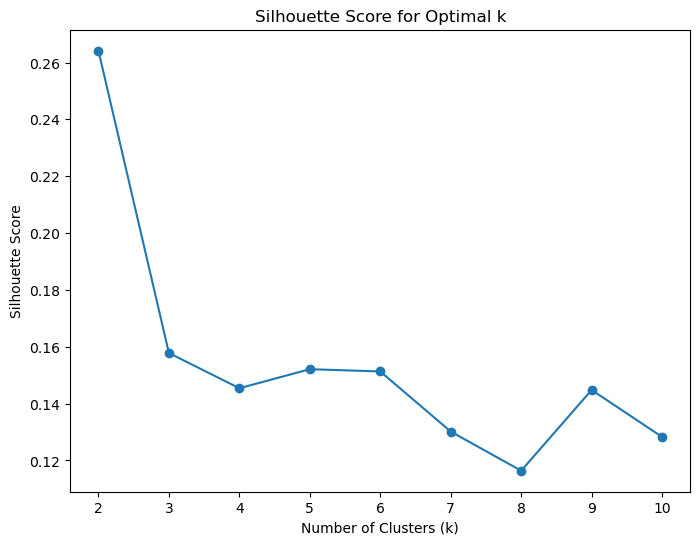

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(transformed_features)
    silhouette_avg = silhouette_score(transformed_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

2,  4-5 seems to be the most optimal range of clusters.
A silhouette score of one means each data point is unlikely to be assigned to another cluster, but a score of below 0.5 is still not satisfying (structure of the cluster might be artificial).

Let's try Gap Statistics.

In [8]:
!pip install gap-stat
from sklearn.cluster import KMeans
from gap_statistic import OptimalK

optimal_k = OptimalK()
n_clusters = optimal_k(transformed_features, cluster_array=np.arange(1, 11))
print("Optimal number of clusters:", n_clusters)

Optimal number of clusters: 9


So there are several options of clusters we can try:
A. 5-10
B. 2 or 4
C. 9

In [9]:
#let's check on transformed_featured first

# Access transformed features
transformed_features = kmeans_pipeline.named_steps['preprocessor'].transform(df_features)

# Retrieve column names after transformation
transformed_columns = kmeans_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Create DataFrame with the transformed features
transformed_features_check = pd.DataFrame(transformed_features, columns=list(numeric_columns) + list(transformed_columns))

# Display the transformed DataFrame
transformed_features_check.head()


after_discount  aov_average  aovdis100-200k  aovdis200-300k  aovdis50-100k  \
0        1.613713     2.737378       -3.001523        0.688330      -2.276312   
1        2.113759     0.343805       -1.003982       -0.780248      -0.000258   
2        1.483105     0.326329       -0.441101        0.358185      -0.403550   
3        0.405801     2.381807       -1.930676        1.177856      -2.016721   
4        2.179387     0.718960       -0.228305        0.267110      -0.639963   

   aovdis<=50k  aovdis>300k  brand_luxe  brand_mass  brand_premium  ...  \
0    -1.154849     2.757856    3.382039   -0.432970       1.522720  ...   
1     0.272516     0.372047    1.761799   -0.107125       1.148001  ...   
2     0.009811     0.286752    0.764729   -0.123216       0.803941  ...   
3    -1.373770     2.255837    2.925048   -1.136957       1.662387  ...   
4    -0.717007     0.759527    0.557005    0.500315      -0.299775  ...   

   returning_shopper_proportion  sales_per_sqm  store_life  store_size  \
0                     -0.024553      -0.880069    0.378968    3.394702   
1                      1.331273      -0.511270    0.378968    2.767004   
2                      0.451859      -0.453565    0.378968    1.982382   
3                     -0.307703      -0.932804    0.378968    1.851612   
4                      1.476594       0.260393    0.378968    1.393915   

   unique_shoppers  area_category_a. Jabodetabek  \
0         0.902114                           1.0   
1         0.987121                           0.0   
2         1.305372                           1.0   
3        -0.086360                           1.0   
4         0.973773                           0.0   

   area_category_b. Java exc Jabodetabek  area_category_c. Outside Java  \
0                                    0.0                            0.0   
1                                    1.0                            0.0   
2                                    0.0                            0.0   
3                                    0.0                            0.0   
4                                    0.0                            1.0   

   city_type_Kabupaten  city_type_Kota  
0                  0.0             1.0  
1                  0.0             1.0  
2                  1.0             0.0  
3                  0.0             1.0  
4                  0.0             1.0  

[5 rows x 48 columns]

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(transformed_features)

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


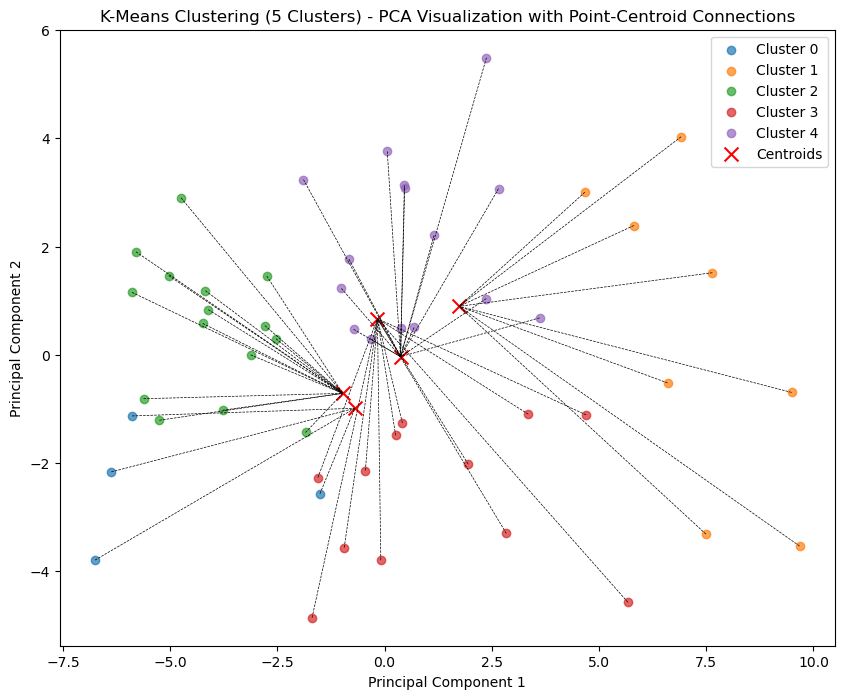

In [11]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(transformed_features)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(transformed_features), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Plot the clusters with lines connecting each point to its centroid
plt.figure(figsize=(10, 8))

for cluster_num in range(5):
    cluster_points = df_pca[df['cluster'] == cluster_num]
    centroid = kmeans.cluster_centers_[cluster_num][:2]  # Assuming only first 2 principal components

    # Plot points
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster_num}', alpha=0.7)

    # Connect each point to its centroid
    for _, point in cluster_points.iterrows():
        plt.plot([point['PC1'], centroid[0]], [point['PC2'], centroid[1]], color='black', linestyle='--', linewidth=0.5)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.title('K-Means Clustering (5 Clusters) - PCA Visualization with Point-Centroid Connections')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


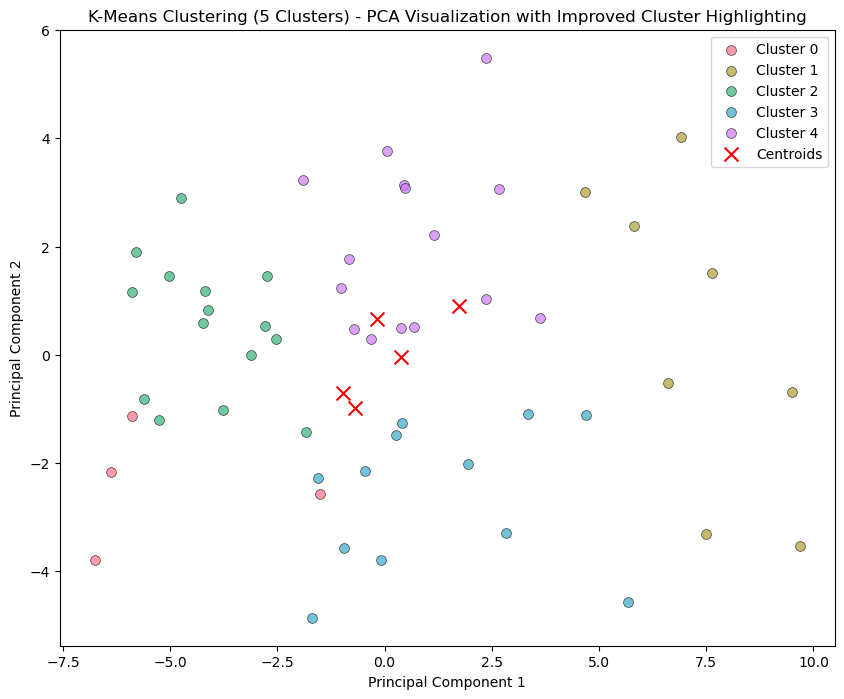

In [12]:
import seaborn as sns

# Set a color palette with distinct colors for each cluster
palette = sns.color_palette("husl", n_colors=5)

plt.figure(figsize=(10, 8))

# Iterate over clusters and plot points with distinct color/marker
for cluster_num in range(5):
    cluster_points = df_pca[df['cluster'] == cluster_num]

    # Plot points with different color and marker for each cluster
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster_num}', alpha=0.7,
                marker='o', s=50, edgecolors='black', linewidths=0.5, color=palette[cluster_num])

# Plot centroids with a distinct marker and color
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.title('K-Means Clustering (5 Clusters) - PCA Visualization with Improved Cluster Highlighting')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Cumulative Explained Variance:
[0.41691384 0.54948235 0.6465477  0.71268426 0.76487928]


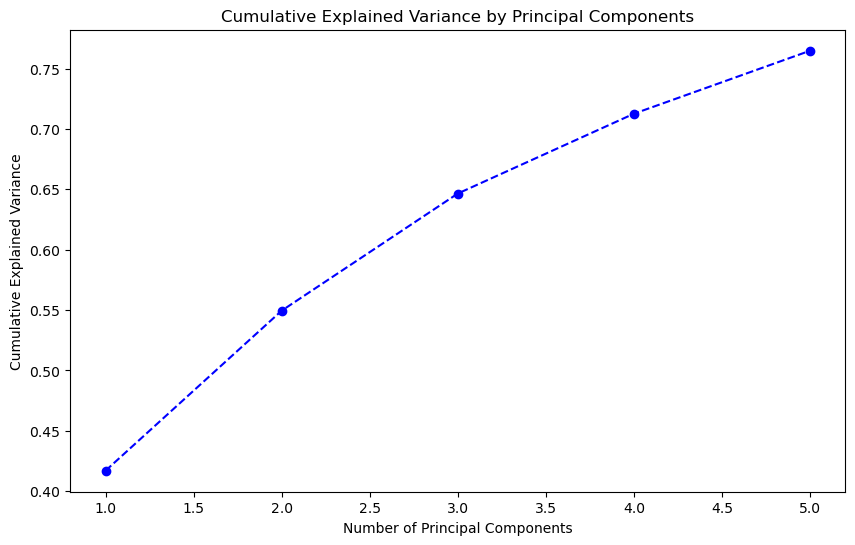

In [13]:
# Get the explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_

# Calculate the total variance explained by the selected number of components
total_var_explained = explained_var_ratio.cumsum()

# Print the cumulative explained variance for each principal component
print("Cumulative Explained Variance:")
print(total_var_explained)

# Visualize the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), total_var_explained, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [14]:
# Check the shape and column names of df
print("Shape of df:", df_features.shape)
print("Column names of df:", df_features.columns)

# Check the shape and column names of transformed_features
print("Shape of transformed_features:", transformed_features_check.shape)
print("Column names of transformed_features:", transformed_features_check.columns)


Shape of df: (54, 45)
Column names of df: Index(['net_rev_monthly', 'after_discount', 'percentage_disc_to_nmv',
       'aov_average', 'order_count', 'quantity_count', 'unique_shoppers',
       'guest_order_proportion', 'store_size', 'sales_per_sqm', 'store_life',
       'cat_skincare', 'cat_makeup', 'cat_bath_and_body', 'cat_haircare',
       'cat_accessories', 'cat_fragrance', 'cat_supplement',
       'cat_shaving_grooming', 'cat_nailcare', 'cat_sanitary', 'cat_oralcare',
       'cat_homecare', 'cat_nursing_feeding', 'cat_fashion',
       'cat_bedding_bathroom', 'cat_miscellaneous', 'area_category',
       'city_type', 'aovdis<=50k', 'aovdis50-100k', 'aovdis100-200k',
       'aovdis200-300k', 'aovdis>300k', 'omni_shopper', 'offline_only',
       'online_order', 'offline_order', 'pickup_shopper', 'pickup_order',
       'returning_shopper_proportion', 'brand_mass', 'brand_premium_mass',
       'brand_premium', 'brand_luxe'],
      dtype='object')
Shape of transformed_features: (54, 48)


In [15]:
# Assuming 'transformed_features' is defined somewhere in your code
# Make sure 'transformed_features' has the same number of columns as your original dataset

# Check the number of columns in df and transformed_features
print("Number of columns in df_features:", df_features.shape[1])
print("Number of columns in transformed_features:", transformed_features.shape[1])

# Check if the number of columns matches
if df_features.shape[1] != transformed_features.shape[1]:
    print("Number of columns in df_features and transformed_features do not match. Adjust the datasets.")

else:
    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=5)
    df_pca = pd.DataFrame(pca.fit_transform(transformed_features_check), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

    # Get the loadings of the original variables on each principal component
    loadings = pca.components_

    # Create a DataFrame to display the loadings
    loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_features.columns[:-1])

    # Display the loadings
    print("Loadings of Original Variables on Each Principal Component:")
    print(loadings_df)


Number of columns in df_features: 45
Number of columns in transformed_features: 48
Number of columns in df_features and transformed_features do not match. Adjust the datasets.


In [16]:
## Assuming 'transformed_features' is defined somewhere in your code
# Make sure 'transformed_features' has the same number of columns as your original dataset

# Check the number of columns in df and transformed_features
print("Number of columns in df_features:", df_features.shape[1])
print("Number of columns in transformed_features:", transformed_features.shape[1])

# Drop the extra column in transformed_features
transformed_features = transformed_features[:, :df_features.shape[1]]

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(transformed_features), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Get the loadings of the original variables on each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_features.columns)

# Display the loadings
print("Loadings of Original Variables on Each Principal Component:")
print(loadings_df[['PC1', 'PC2']])

# Display the variables ranked by their influence on the first principal component
print("\nVariables ranked by influence on PC1:")
print(loadings_df['PC1'].abs().sort_values(ascending=False))

# Display the variables ranked by their influence on PC2
print("\nVariables ranked by influence on PC2:")
print(loadings_df['PC2'].abs().sort_values(ascending=False))


Number of columns in df_features: 45
Number of columns in transformed_features: 48
Loadings of Original Variables on Each Principal Component:
                                   PC1           PC2
net_rev_monthly               0.219796  1.001312e-01
after_discount                0.162501 -1.931281e-01
percentage_disc_to_nmv       -0.073147  1.550708e-01
aov_average                   0.093394 -1.543965e-01
order_count                  -0.146284  2.149133e-01
quantity_count               -0.132975  1.315732e-01
unique_shoppers               0.156952 -2.080513e-01
guest_order_proportion        0.168625 -1.739798e-01
store_size                   -0.088258  8.777372e-02
sales_per_sqm                 0.107786 -2.801555e-01
store_life                   -0.047927  2.250372e-01
cat_skincare                  0.227751  4.877075e-02
cat_makeup                    0.206919  1.831789e-01
cat_bath_and_body             0.115091 -1.325665e-01
cat_haircare                 -0.000000 -2.584939e-26
cat_acces

In [17]:
# Save the loadings for PC1 and PC2 to a CSV file
loadings_df[['PC1', 'PC2']].to_csv('loadings_pc1_pc2.csv')

In [18]:
for cluster_num, group in df.groupby('cluster'):
    print(f"Cluster {cluster_num}:\n")
    print(group)
    print("\n" + "="*50 + "\n")


Cluster 0:

                         store_name  net_rev_monthly  after_discount  \
21       Sociolla Festival Citylink       1109933759      1252117492   
29        Sociolla Gajah Mada Plaza        576213355       662419221   
32   Sociolla Living World Denpasar       1530052355      1736326733   
41  Sociolla Pakuwon Mall Solo Baru        525188942       608812557   

    percentage_disc_to_nmv  aov_average  order_count  quantity_count  \
21                  0.2619       192811         6494           17028   
29                  0.2806       194715         3402            8956   
32                  0.2165       245147         7083           20861   
41                  0.2356       210298         2895            7633   

    unique_shoppers  guest_order_proportion  store_size  ...  online_order  \
21             5472                0.043117         175  ...        0.3234   
29             2322                0.127866         139  ...        0.3429   
32             3190             

In [19]:
# this code downloads the results to check the clustering validity
import os
df['cluster'] = kmeans.fit_predict(transformed_features)
unique_clusters = df['cluster'].unique()

# Group by 'cluster' and store each cluster as a separate DataFrame
cluster_results = {cluster_num: group for cluster_num, group in df.groupby('cluster')}
save_directory = 'C:/Users/tiara.santoso/Downloads/Data Exports'

# Save each cluster as a separate CSV file
# for cluster_num in unique_clusters:
#     cluster_df = cluster_results[cluster_num]
#     file_path = os.path.join(save_directory, f'cluster_{cluster_num}_results.csv')
#     cluster_df.to_csv(file_path, index=False)

# Alternatively, concatenate all clusters into a single DataFrame and save as one CSV file
all_cluster_df = pd.concat(list(cluster_results.values()), ignore_index=True)
all_file_path = os.path.join(save_directory, '20240117-all_clusters_results_1.1_without_outliers_clusters2.csv')
all_cluster_df.to_csv(all_file_path, index=False)


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
features = ['net_rev_monthly','after_discount','percentage_disc_to_nmv','aov_amount','order_count','quantity_count','unique_shoppers',
            'guest_order','store_size','sales_per_sqm','store_life','cat_skincare','cat_makeup','cat_bath_and_body','cat_haircare','cat_accessories',
            'cat_fragrance','cat_supplement','cat_shaving_grooming','cat_nailcare','cat_sanitary','cat_oralcare','cat_homecare','cat_nursing_feeding','cat_fashion',
            'cat_bedding_bathroom','cat_miscellaneous','area_category','city_type','aovdis<=50k','aovdis50-100k','aovdis100-200k','aovdis200-300k','aovdis>300k',
            'omni_shopper','offline_only','online_order','offline_order','pickup_shopper','pickup_order']

cluster_stats = df.groupby('cluster')[features].describe()
print(cluster_stats)

KeyError: "Columns not found: 'guest_order', 'aov_amount'"

In [ ]:

cluster_stats = df.groupby('cluster')[features].describe()

save_directory = r'C:\Users\tiara.santoso\Downloads\Data Exports'
cluster_stats.to_csv(os.path.join(save_directory, '20240117-cluster_stats_outliers2.csv'))

In [ ]:
import seaborn as sns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} within Clusters')
    plt.show()

In [ ]:
import seaborn as sns


In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
scatter = ax.scatter(df['aov_amount'], df['unique_shoppers'], df['store_size'], c=df['cluster'], cmap='viridis', alpha=0.7)

ax.set_xlabel('AOV Amount')
ax.set_ylabel('Unique Shoppers')
ax.set_zlabel('Store Size')
ax.set_title('K-Means Clustering (5 Clusters) - 3D Visualization')

# Add a legend
legend_labels = np.unique(df['cluster'])
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()